<a href="https://colab.research.google.com/github/chaturvediosmio/Palette-Extractor-K-Means/blob/main/Color_Palette_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KMeans from Scratch

In [2]:
from PIL import Image
import numpy as np
from math import sqrt
import random
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex, to_rgb


In [3]:
class Point:
  def __init__(self, coordinates):
      self.coordinates = coordinates

In [4]:
class Cluster:
  def __init__(self, center, points):
    self.center = center
    self.points = points

In [5]:
class kMeans:
  def __init__(self, k_clusters, min_diff = 1):
    self.k_clusters = k_clusters
    self.min_diff = min_diff

  def get_centroid(self, points):
    n_dim = len(points[0].coordinates)    
    vals = [0.0 for i in range(n_dim)]    
    for p in points:
      for i in range(n_dim):
        vals[i] += p.coordinates[i]
    coords = [(v / len(points)) for v in vals]    
    print("get_centroid executed")
    return Point(coords)

  def assign_points(self, clusters, points):
    plists = [[] for i in range(self.k_clusters)]
    for p in points:
      smallest_distance = float('inf')

      for i in range(self.k_clusters):
        new_distance = distance(p, clusters[i].center)
        if new_distance < smallest_distance:
          smallest_distance = new_distance
          idx = i

      plists[idx].append(p)
    print("assign_points executed")
    return plists

  def fit(self, points):
    clusters = [Cluster(center=p, points=[p]) for p in random.sample(points, self.k_clusters)]
    while True:

      plists = self.assign_points(clusters, points)

      diff = 0

      for i in range(self.k_clusters):
        if not plists[i]:
          continue
        old = clusters[i]
        center = self.get_centroid(plists[i])
        new = Cluster(center, plists[i])
        clusters[i] = new
        diff = max(diff, distance(old.center, new.center))

      if diff < self.min_diff:
        break
    print("fit executed")
    return clusters


In [6]:
def get_points(img_path):
  points = []
  img = Image.open(img_path)
  w,h =  img.size
  while(w>=400 or h>=400):
    w=w//2
    h=h//2
  size = w,h
  img.thumbnail(size)
  img = img.convert('RGB')

  for i, color in img.getcolors(w*h):
    for _ in range (i):
      points.append(Point(color))
  print("get_points executed")
  return(points)

In [7]:
def distance(x, y):
  n_dims = len(x.coordinates)
  return(sqrt(sum([(x.coordinates[i] - y.coordinates[i]) ** 2 for i in range(n_dims)])))
  #dist = np.linalg.norm(x - y)
  #print("distance executed")
  #return(dist)


In [8]:
def rgb_to_hex(rgb):
  print("rgb to gex executed")
  return '#%s' % ''.join(('%02x' % p for p in rgb))

In [9]:
def get_colors(filename, n_colors=3):
  points = get_points(filename)
  clusters = kMeans(k_clusters=n_colors).fit(points)
  clusters.sort(key=lambda c: len(c.points), reverse = True)
  rgbs = [map(int, c.center.coordinates) for c in clusters]
  print("get_colors executed")
  return list(map(rgb_to_hex, rgbs))

##Driver Code

In [11]:
if __name__ == '__main__':
  path = 'starry_night.jpg'
  print(type(path))
  colors = get_colors(path, n_colors=5)
  

<class 'str'>
get_points executed
assign_points executed
get_centroid executed
get_centroid executed
get_centroid executed
get_centroid executed
get_centroid executed
assign_points executed
get_centroid executed
get_centroid executed
get_centroid executed
get_centroid executed
get_centroid executed
assign_points executed
get_centroid executed
get_centroid executed
get_centroid executed
get_centroid executed
get_centroid executed
assign_points executed
get_centroid executed
get_centroid executed
get_centroid executed
get_centroid executed
get_centroid executed
assign_points executed
get_centroid executed
get_centroid executed
get_centroid executed
get_centroid executed
get_centroid executed
assign_points executed
get_centroid executed
get_centroid executed
get_centroid executed
get_centroid executed
get_centroid executed
assign_points executed
get_centroid executed
get_centroid executed
get_centroid executed
get_centroid executed
get_centroid executed
assign_points executed
get_centroid

##Show Colors

In [12]:
", ".join(colors)

'#647d97, #3d5486, #1e2123, #313c51, #9ea789'

[100 125 151]
[ 61  84 134]
[30 33 35]
[49 60 81]
[158 167 137]


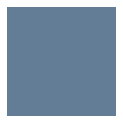

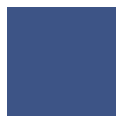

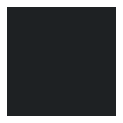

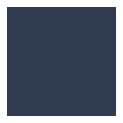

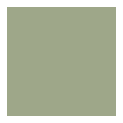

In [15]:
for color in colors:
  x = np.multiply(to_rgb(color), 255).astype(int)
  plt.figure(figsize=(2,2))
  plt.axis('off')
  plt.imshow([[x]])
  plt.show
  print(x)
#plt.imshow([[(155, 165, 139)]])
#plt.show()

#KMeans from Library

In [93]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.colors import to_hex
%matplotlib inline

In [187]:
def read_img(path):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  scale_percent = 20 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

  print(f"original shape: {resized.shape}")
  plt.figure(figsize=(7,7))
  plt.imshow(resized)
  plt.show()
  return(resized)

In [189]:
def flat_shape(resized):
  rimage = resized.copy()
  rimage = np.reshape(rimage, (-1,3))
  print(f"new shape: {rimage.shape}")
  return rimage

In [76]:
def cluster_counts(labels):
  clusters = kmeans.cluster_centers_.astype(int)
  #print(clusters)
  unique = np.array(np.unique(labels, return_counts=True))
  l1 = unique[0]
  l2 = unique[1]
  #print(l1)
  #print(l2)
  #print(list(zip(l1, l2)))
  mapped = list(zip(clusters, l2))
  res = sorted(mapped, key = lambda x: x[1], reverse=True)
  return res

In [181]:
'''
def show_colors(uniques):
  for color,cluster in uniques:
    color_norm = np.multiply(1/255., color)
    hex_color = to_hex(color_norm)
    print(hex_color)
    plt.figure(figsize=(3,3))
    plt.axis('off')
    plt.imshow([[color]])
    plt.show
  '''

"\ndef show_colors(uniques):\n  for color,cluster in uniques:\n    color_norm = np.multiply(1/255., color)\n    hex_color = to_hex(color_norm)\n    print(hex_color)\n    plt.figure(figsize=(3,3))\n    plt.axis('off')\n    plt.imshow([[color]])\n    plt.show\n  "

In [182]:
def all_color(uniques):
  for color,cluster in uniques:
    color_norm = np.multiply(1/255., color)
    hex_color = to_hex(color_norm)
    plt.figure(facecolor = color_norm, figsize=(5,1))
    plt.axis('off')
    plt.suptitle(hex_color, x=0.1, color='white')
    #plt.imshow([[color]])
    #plt.show
    #fig.canvas.tostring_rgb()

In [183]:
'''
def horizontal_colors(uniques):
  start = 0
  color_palette = np.zeros((100,500,3)).astype(np.int64)
  for color, cluster in uniques:
      width = 100
      end = start+width
      color_palette[:,start:end, :] = color
      start = end
  plt.axis('off')
  plt.imshow(color_palette)
  plt.show()
  '''

"\ndef horizontal_colors(uniques):\n  start = 0\n  color_palette = np.zeros((100,500,3)).astype(np.int64)\n  for color, cluster in uniques:\n      width = 100\n      end = start+width\n      color_palette[:,start:end, :] = color\n      start = end\n  plt.axis('off')\n  plt.imshow(color_palette)\n  plt.show()\n  "

In [213]:
def new_image(original, flat, uniques):
  clusters = kmeans.cluster_centers_.astype(int)
  labels = kmeans.labels_
  for i in range(flat.shape[0]):
    flat[i] = clusters[labels[i]]

  flat = np.reshape(flat, (original.shape[0], original.shape[1], 3))

  plt.figure(figsize = (15,15))
  plt.subplot(1,2,1)

  plt.axis('off')
  plt.imshow(original)
  
  plt.subplot(1,2,2)
  plt.axis('off')
  plt.imshow(flat)

  plt.show


original shape: (202, 256, 3)


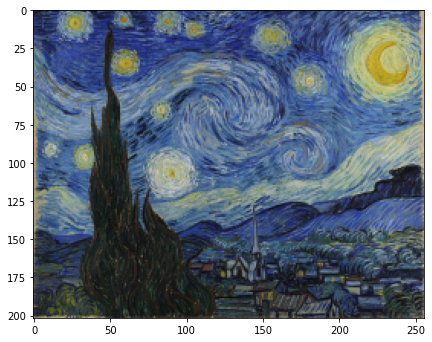

new shape: (51712, 3)


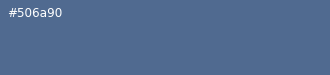

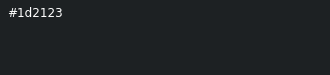

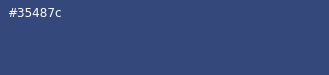

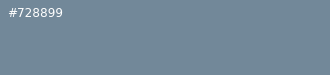

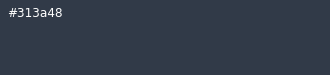

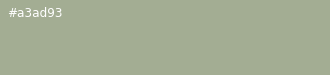

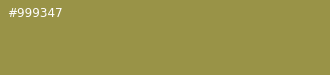

In [222]:
if __name__ == '__main__':
  path = 'starry_night.jpg'
  original_img = read_img(path)
  img = flat_shape(original_img)
  kmeans = KMeans(n_clusters=7, random_state=42)
  kmeans.fit_predict(img)
  zipped_uniques = cluster_counts(kmeans.labels_)
  #show_colors(zipped_uniques)
  all_color(zipped_uniques)
  #horizontal_colors(zipped_uniques)


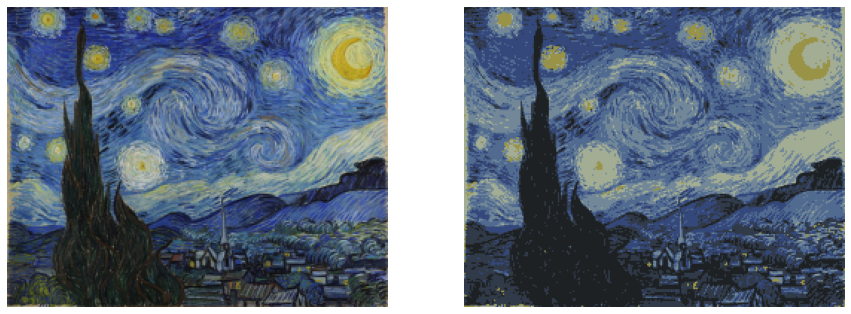

In [223]:
  new_image(original_img, img, zipped_uniques)